# Parte I: Búsqueda y Análisis de Conjuntos de Datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Búsqueda de Conjuntos de Datos:
Buscar al menos cuatro conjuntos de datos en plataformas como Kaggle, UCI Machine Learning Repository o cualquier otra fuente confiable.
Asegurarse de que los conjuntos de datos seleccionados sean diversos y cubran diferentes dominios y tipos de datos.


## 2.Análisis Exploratorio de Datos (EDA) Inicial:

### Data Set N°3 : Ingresos

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df_in = pd.read_csv(url, header=None, na_values=" ?", skipinitialspace=True)
column_names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "income"
]
df_in.columns = column_names

In [ ]:
df_in.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Análisis Exploratorio de Datos (EDA) Inicial:

In [ ]:
df_in.info()

In [ ]:
df_in["workclass"]

df_in[df_in["native_country"] == "?"]
df_in[df_in["occupation"] == "?"]
df_in["occupation"].value_counts()
df_in["relationship"].value_counts()

df_in[(df_in["workclass"] == "?") & (df_in["native_country"] == "?") & (df_in["occupation"] == "?") ]

df_in["relationship"].value_counts()

#Como las variables que presentan datos faltantes son bastantes y son categoricas nominal he decidio no utlizarlos para el entrenamiento del modelo.
df_in = df_in[~((df_in["workclass"] == "?") & (df_in["native_country"] == "?") & (df_in["occupation"] == "?"))]

In [ ]:
#revisar si existen duplicados
df_in[df_in.duplicated()]

#Aunque existen valores duplicados no los voy a eliminar porque puede haber dos personas que presentan las mismas caracteristicas.
#Es posible que dos o más personas tengan el mismo fnlwgt si sus características demográficas y factores de ajuste resultaron en el mismo cálculo.

In [ ]:
#voy a reemplzar los datos faltantes por la moda y crear un df_in_mode para entrenar el modelo con otros datps

df_in_mode=df_in
df_in_mode.loc[df_in["workclass"] == "?", "workclass"] = df_in_mode.loc[df_in["workclass"] != "?", "workclass"].mode()[0]
df_in_mode.loc[df_in["native_country"] == "?", "native_country"] = df_in_mode.loc[df_in["native_country"] != "?", "native_country"].mode()[0]
df_in_mode.loc[df_in["occupation"] == "?", "occupation"] = df_in_mode.loc[df_in["occupation"] != "?", "occupation"].mode()[0]
df_in =df_in_mode

In [ ]:
df_in.info()

In [ ]:
df_in.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32534.0,38.581976,13.638271,17.0,28.0,37.0,48.00,90.0
fnlwgt,32534.0,189764.333251,105540.664594,12285.0,117799.0,178363.0,236993.75,1484705.0
education_num,32534.0,10.080593,2.572388,1.0,9.0,10.0,12.00,16.0
capital_gain,32534.0,1078.079240,7388.178272,0.0,0.0,0.0,0.00,99999.0
capital_loss,32534.0,87.274974,402.934330,0.0,0.0,0.0,0.00,4356.0
hours_per_week,32534.0,40.443690,12.344959,1.0,40.0,40.0,45.00,99.0


#### Visualizaciones


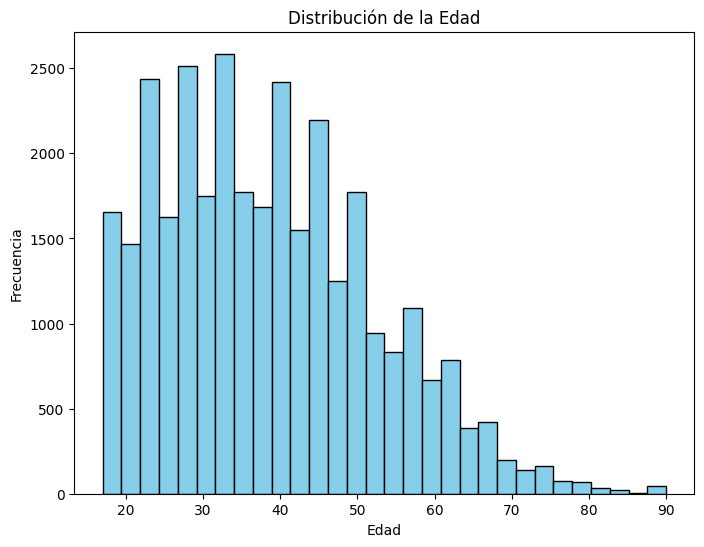

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df_in["age"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


Hay muchas más personas jóvenes y de mediana edad (20-50 años) que personas mayores de 60.
Los grupos más grandes están entre los 25 y 40 años, lo que indica que la mayoría de los datos representan a adultos en edad laboral.

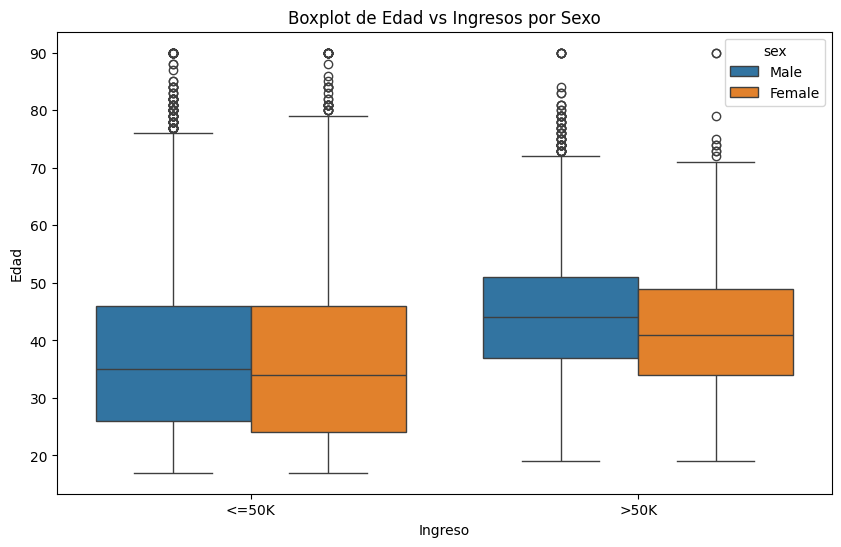

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_in, x="income", y="age", hue="sex")
plt.title("Boxplot de Edad vs Ingresos por Sexo")
plt.xlabel("Ingreso")
plt.ylabel("Edad")
plt.show()

## Diagnóstico y Selección de Problema

Dataset N°3 : Ingresos ---> target: income (categoria) ---> clasificador  

Para este dataset he seleccionado un modelo de clasificación ya el target o variable objetivo (income) es una categórica binaria (<=50K o >50K), que indica si una persona gana más o menos de 50 mil dólares anuales. Este tipo de problema requiere predecir clases a partir de variables numéricas y categóricas, por lo que modelos de casificación como árboles de decisión, random forests o regresión logística permiten encontrar patrones en los atributos que determinan el nivel de ingreso, permitiendo generar perfiles sobre la población.